# ✨ Logistic Regression ✨
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

# Contents:

1. Scratch implementation of Logistic Regression using numpy on Netflix Movies and TV Shows dataset
2. Sklearn implementation of Logistic Regression on the breast cancer wisconsin dataset
3. PyTorch implementation of Logistic Regression on the breast cancer wisconsin dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import zipfile
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
from torch.optim import SGD
from sklearn.model_selection import train_test_split
import numpy as np


# Data


*   https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

*   https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows

> We are going to use the `load_breast_cancer` dataset for PyTorch and Sklearn implementation.This dataset is a classic and easy-to-use binary classification dataset, where the goal is to classify whether a breast tumor is malignant (cancerous) or benign (non-cancerous).

> In addition, we will use the `Netflix Movies and TV Shows` dataset for Scratch implementation. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration more.







The equations for logistic regression cost function (cross-entropy) and sigmoid function

Cost function:

$$
Cross-Entropy-Loss = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

Sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

#Logistic Regression (numpy)

In [8]:
def sigmoid(z):
  '''
    Appliy the sigmoid function.
    The sigmoid function returns the output from 0 to 1
  '''
  return 1 / (1 + np.exp(-z))

###################################

def log_reg_cost(y, y_hat):
  '''
    This function caleculate and return the loss of the logistic regression.

    Function is slightly different from mentioned above because this one handles batched/vector/multiple inputs (rather than just one).
    This function sums and takes average across the vector.
  '''
  return -1/len(y) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

###################################

def log_reg_gradient_descent(X, y, learning_rate, num_iters= 500):
  '''
    This function take the data set as input and returns optimized weights.
  '''

  m, n = X.shape # m: The number of data samples (rows) in the dataset X, while n: The number of features (columns) in the dataset X.

  theta = np.zeros(n) # the weights (or parameters) of the logistic regression model one weight per feature).

  losses = []

  for _ in tqdm(range(num_iters)):
    # Forward Pass:
    # This is where the model predicts outputs (y_hat) using the current weights (theta).
    z = np.dot(X, theta)
    y_hat = sigmoid(z)

    # Backward Pass:
    # This is where the model computes the error and adjusts the weights to minimize it.
    gradient = np.dot(X.T, (y_hat - y)) / m # the derivative of the loss function with respect to the weights theta.
                                            # It tells how much and in what direction to adjust the weights.

    # This adjusts the weights (theta) by moving them in the direction that reduces the loss.
    theta -= learning_rate * gradient

    # caleculate the loss
    loss = log_reg_cost(y, y_hat)
    losses.append(loss)

  plt.plot(losses)

  return theta

###################################

def predict(X, theta, threshold=0.5):
  '''Predict using the learned weights.'''
  probabilities = sigmoid(np.dot(X, theta))
  return (probabilities >= threshold).astype(int)


In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")
dataset_path = f"{path}/netflix_titles.csv"
data = pd.read_csv(dataset_path)

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [54]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [55]:
# Let's check the missing values.
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [56]:
# Drop rows where 'director', 'cast', 'country', or 'date_added' have missing values
data.dropna(subset=['director', 'cast', 'country', 'date_added', 'rating', 'duration'], inplace=True)

In [57]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [58]:
# Let's check the categorical columns
def encode_categorical_columns(df):
    categorical_cols = data.select_dtypes(include=["object"]).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(data)


Categorical Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [59]:
# Convert categorical variables into numerical formats manually.
# predicting whether a title is a movie or TV show, encode 'type' as 1 for Movie and 0 for TV Show:
print(f"Encoding column: type")
data['type'] = data['type'].apply(lambda x: 1 if x == "Movie" else 0)

# Convert categorical variables into numerical formats by LabelEncoder.

categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

data

Encoding column: type
Encoding column: show_id
Encoding column: title
Encoding column: director
Encoding column: cast
Encoding column: country
Encoding column: date_added
Encoding column: rating
Encoding column: duration
Encoding column: listed_in
Encoding column: description


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,4632,1,3686,1309,2721,536,1405,1993,8,27,238,3389
8,5264,0,4399,256,3253,409,1405,2021,6,187,89,795
9,0,1,4733,3619,3259,490,1405,2021,4,5,156,920
12,176,1,2155,695,2987,167,1400,2021,8,29,245,1353
24,963,1,2157,3183,3843,195,1391,1998,6,72,179,5063
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,5250,1,5305,2201,273,403,979,2015,8,194,251,3558
8802,5251,1,5308,857,3135,490,1153,2007,5,64,205,604
8804,5252,1,5310,3164,2203,490,1107,2009,5,185,166,3224
8805,5253,1,5312,2817,4806,490,511,2006,3,185,97,2210


In [62]:
# Let's use MinMaxScaler to scale the data.
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.drop("type")  ### DON'T SCALE THE TARGET
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,0.868880,1,0.691427,0.331897,0.523370,0.888889,0.967631,0.645570,0.615385,0.137056,0.712575,0.637030
8,0.987432,0,0.825174,0.064909,0.625697,0.678275,0.967631,1.000000,0.461538,0.949239,0.266467,0.149436
9,0.000000,1,0.887826,0.917596,0.626851,0.812604,0.967631,1.000000,0.307692,0.025381,0.467066,0.172932
12,0.033014,1,0.404239,0.176217,0.574534,0.276949,0.964187,1.000000,0.615385,0.147208,0.733533,0.254323
24,0.180642,1,0.404615,0.807049,0.739181,0.323383,0.957989,0.708861,0.461538,0.365482,0.535928,0.951692
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0.984806,1,0.995123,0.558063,0.052510,0.668325,0.674242,0.924051,0.615385,0.984772,0.751497,0.668797
8802,0.984993,1,0.995686,0.217292,0.603001,0.812604,0.794077,0.822785,0.384615,0.324873,0.613772,0.113534
8804,0.985181,1,0.996061,0.802231,0.423735,0.812604,0.762397,0.848101,0.384615,0.939086,0.497006,0.606015
8805,0.985369,1,0.996436,0.714249,0.924409,0.812604,0.351928,0.810127,0.230769,0.939086,0.290419,0.415414


In [63]:
# Let's check the duplicate Samples
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicate Samples: {duplicates}")
    if duplicates > 0:
        print("Dropping Duplicates...")
        df.drop_duplicates(inplace=True)
        print("Duplicates Dropped.")
    else:
        print("No Duplicate Samples Found.")

check_duplicates(data)

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [64]:
X = data.drop("type",axis=1)
y = data['type']

100%|██████████| 1000/1000 [00:02<00:00, 376.44it/s]


The model predicted 5185 out of 5332 predictions correctly
Accuracy: 97.24%


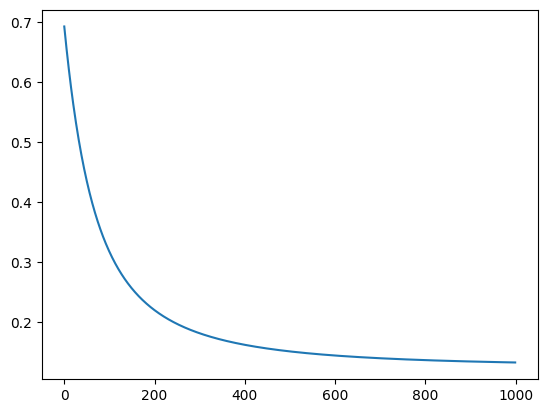

In [71]:
# Train the model
learning_rate = 0.01
num_iters = 1000
theta = log_reg_gradient_descent(X, y, learning_rate, num_iters)

# Test predictions
predictions = predict(X, theta)
accuracy = np.mean(predictions == y) * 100
correct_mask = (predictions == y)
correct_count = correct_mask.sum()
total_count = len(predictions)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')

print(f"Accuracy: {accuracy:.2f}%")

Let's also take a look at confusion matrix

confusion matrix shows us the following:

```
TP FP
FN TN
```

i.e

- True Positive: How many actual labels were positive and were predicted positive too (the model predicted right)
- False Positive: How many actual labels were negative but were predicted positive
- False Negative: How many actual labels were positive but were predicted negative
- True Negative: How many actual labels were negative and were predicted negative (the model predicted right)

In [73]:
confusion_matrix(y, predictions)

array([[   0,  147],
       [   0, 5185]])

#Logistic Regression (Sklearn)

In [147]:
# let's load breast cancer and have a look at it
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer() # returns a dict

print(breast_cancer_data.keys(), '\n')

print('given features:', breast_cancer_data['feature_names'])
print('flower names (class names):', breast_cancer_data['target_names'])

# Load the Breast Cancer dataset

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

given features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
flower names (class names): ['malignant' 'benign']


In [148]:
print(X.shape)
print(y.shape)

print(np.unique(y))

(569, 30)
(569,)
[0 1]


In [149]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

correct_mask = (y_pred == y_test)  # the predictions from testing features is supposed to be compared to labels of testing data
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100:.2f}%)')

The model predicted 112 out of 114 predictions correctly
The Accuracy is 0.9824561403508771 (98.25%)


In [150]:
confusion_matrix(y_test, y_pred)

array([[41,  1],
       [ 1, 71]])

#Logistic Regression (PyTorch)

In [151]:

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)


In [152]:
# Torch module based model for logistic_regression
class LogisticRegression_NN(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression_NN, self).__init__()
    self.linear_weights = nn.Linear(input_dim, 1)

  def forward(self, x):
    y = self.linear_weights(x)
    z = torch.sigmoid(y)  # a sigmoid over a linear layer output
    return z

In [153]:
# Training the model
input_dim = X_train.shape[1]
model = LogisticRegression_NN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss (binary because 2 classes). Cross entropy function in torch is multi-class
optimizer = SGD(model.parameters(), lr=0.01)

num_epochs = 1000
lr = 1e-2

train_losses = []

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))

  # Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.2479
Epoch [200/1000], Loss: 0.1861
Epoch [300/1000], Loss: 0.1568
Epoch [400/1000], Loss: 0.1392
Epoch [500/1000], Loss: 0.1273
Epoch [600/1000], Loss: 0.1187
Epoch [700/1000], Loss: 0.1121
Epoch [800/1000], Loss: 0.1068
Epoch [900/1000], Loss: 0.1025
Epoch [1000/1000], Loss: 0.0989


In [154]:
model.eval()
with torch.no_grad():

  y_pred = model(X_test)
  y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 96.49%


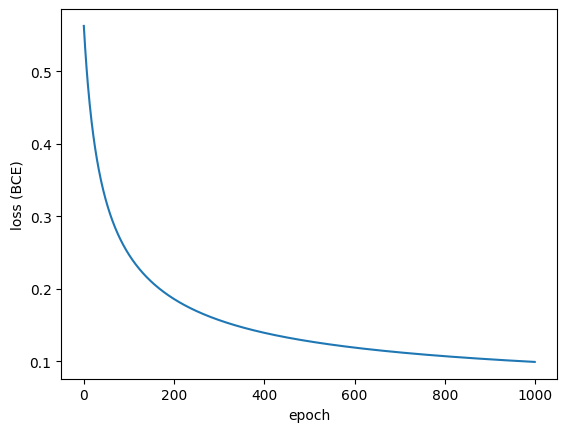

In [155]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()